**Neural Networks & Deep Learning  Programming Quiz**

*Venkata Suraj, Gamini*

*700744962*

**Time Series Forecasting Task:**


1.  Load a time series dataset (e.g., stock prices, weather data).
2.  Build a recurrent neural network (RNN) or LSTM model using Keras.
3.  Train the model to forecast future values based on historical data.
4.  Evaluate the model's performance using appropriate metrics (e.g., MAE, RMSE).



I**mage Classification Task:**


1.   Load the MNIST dataset.
2.   Build a simple convolutional neural network (CNN) using Keras Sequential model.
3.   Train the CNN model on the MNIST dataset.
4.   Evaluate the model's performance on a test set and report accuracy.
5.   Use grid search to optimize hyperparameters such as learning rate, batch size, and optimizer choice.
6.    Use Callback functions to automate training process like “ReduceLROnPlateau” and keep check on validation loss. Also use history object for result visualization.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error

# Load the Air Passengers dataset
data = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv')


In [2]:
print(data.head())


     Month  Passengers
0  1949-01         112
1  1949-02         118
2  1949-03         132
3  1949-04         129
4  1949-05         121


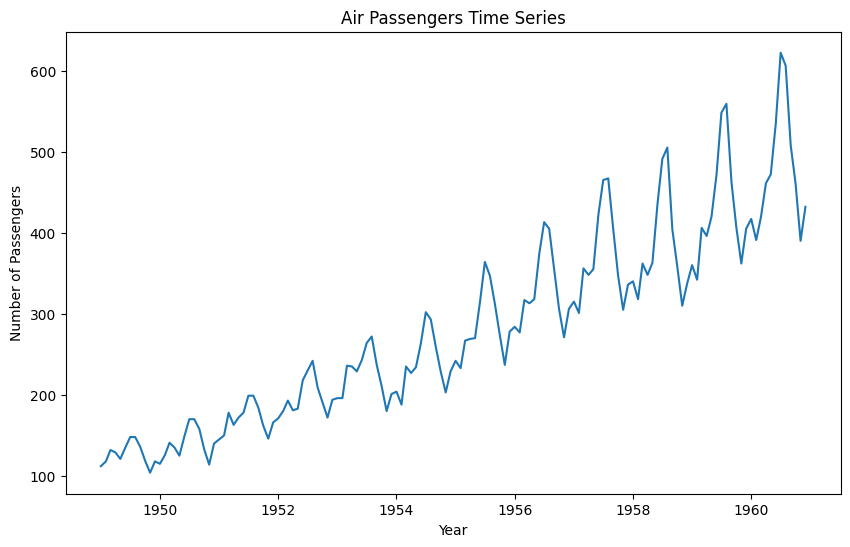

Training set size: 115
Testing set size: 29


In [3]:
# Convert 'Month' column to datetime
data['Month'] = pd.to_datetime(data['Month'])

# Set 'Month' column as index
data.set_index('Month', inplace=True)

# Plot the original time series data
plt.figure(figsize=(10, 6))
plt.plot(data)
plt.title('Air Passengers Time Series')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.show()

# Split the data into training and testing sets (80% train, 20% test)
train_size = int(len(data) * 0.8)
test_size = len(data) - train_size
train, test = data.iloc[:train_size], data.iloc[train_size:]

print("Training set size:", len(train))
print("Testing set size:", len(test))


In [4]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)


In [5]:
def create_sequences(data, lookback):
    X, y = [], []
    for i in range(len(data) - lookback):
        X.append(data[i:(i + lookback), 0])
        y.append(data[i + lookback, 0])
    return np.array(X), np.array(y)

# Define the lookback window size
lookback = 12

# Create training and testing sequences
X_train, y_train = create_sequences(train_scaled, lookback)
X_test, y_test = create_sequences(test_scaled, lookback)

# Reshape input data to be 3D (samples, timesteps, features)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [6]:
# Define the LSTM model
model = Sequential([
    LSTM(units=50, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(units=1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)


Epoch 1/100
4/4 [==============================] - 4s 368ms/step - loss: 0.1094 - val_loss: 0.3397
Epoch 2/100
4/4 [==============================] - 0s 30ms/step - loss: 0.0550 - val_loss: 0.1569
Epoch 3/100
4/4 [==============================] - 0s 28ms/step - loss: 0.0201 - val_loss: 0.0526
Epoch 4/100
4/4 [==============================] - 0s 44ms/step - loss: 0.0135 - val_loss: 0.0423
Epoch 5/100
4/4 [==============================] - 0s 44ms/step - loss: 0.0210 - val_loss: 0.0408
Epoch 6/100
4/4 [==============================] - 0s 52ms/step - loss: 0.0162 - val_loss: 0.0444
Epoch 7/100
4/4 [==============================] - 0s 47ms/step - loss: 0.0121 - val_loss: 0.0574
Epoch 8/100
4/4 [==============================] - 0s 71ms/step - loss: 0.0120 - val_loss: 0.0622
Epoch 9/100
4/4 [==============================] - 0s 61ms/step - loss: 0.0122 - val_loss: 0.0578
Epoch 10/100
4/4 [==============================] - 0s 38ms/step - loss: 0.0118 - val_loss: 0.0503
Epoch 11/100
4/4 [

In [7]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)


Epoch 1/100
4/4 [==============================] - 0s 42ms/step - loss: 0.0052 - val_loss: 0.0414
Epoch 2/100
4/4 [==============================] - 0s 17ms/step - loss: 0.0049 - val_loss: 0.0244
Epoch 3/100
4/4 [==============================] - 0s 20ms/step - loss: 0.0040 - val_loss: 0.0634
Epoch 4/100
4/4 [==============================] - 0s 17ms/step - loss: 0.0055 - val_loss: 0.0188
Epoch 5/100
4/4 [==============================] - 0s 26ms/step - loss: 0.0053 - val_loss: 0.0504
Epoch 6/100
4/4 [==============================] - 0s 17ms/step - loss: 0.0047 - val_loss: 0.0322
Epoch 7/100
4/4 [==============================] - 0s 19ms/step - loss: 0.0047 - val_loss: 0.0290
Epoch 8/100
4/4 [==============================] - 0s 21ms/step - loss: 0.0040 - val_loss: 0.0248
Epoch 9/100
4/4 [==============================] - 0s 17ms/step - loss: 0.0060 - val_loss: 0.0309
Epoch 10/100
4/4 [==============================] - 0s 18ms/step - loss: 0.0054 - val_loss: 0.0442
Epoch 11/100
4/4 [=

In [8]:
# Predict on testing data
y_pred = model.predict(X_test)

# Invert scaling to get original values
y_pred = scaler.inverse_transform(y_pred)
y_test_orig = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate MSE and RMSE
mse = mean_squared_error(y_test_orig, y_pred)
rmse = np.sqrt(mse)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)


1/1 [==============================] - 1s 737ms/step
Mean Squared Error (MSE): 4304.793802369002
Root Mean Squared Error (RMSE): 65.61092746158221


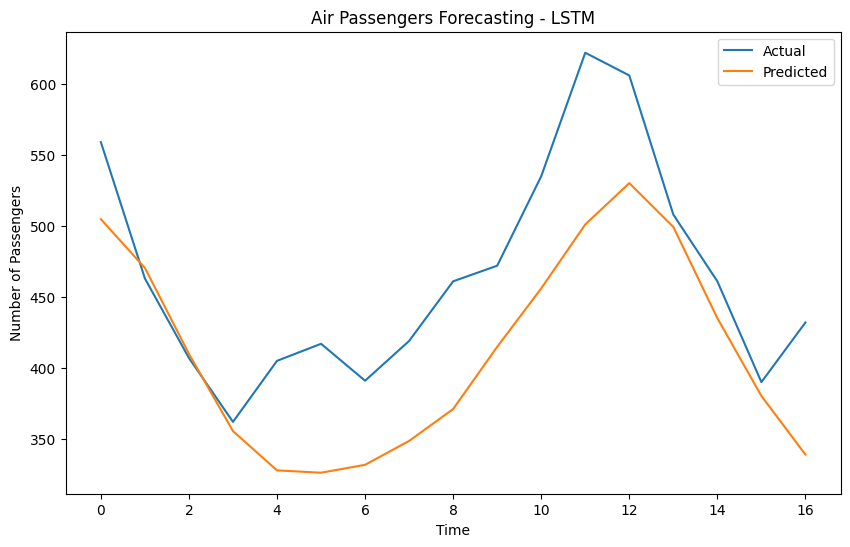

In [9]:
# Plot the predicted vs. actual values
plt.figure(figsize=(10, 6))
plt.plot(y_test_orig, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('Air Passengers Forecasting - LSTM')
plt.xlabel('Time')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()


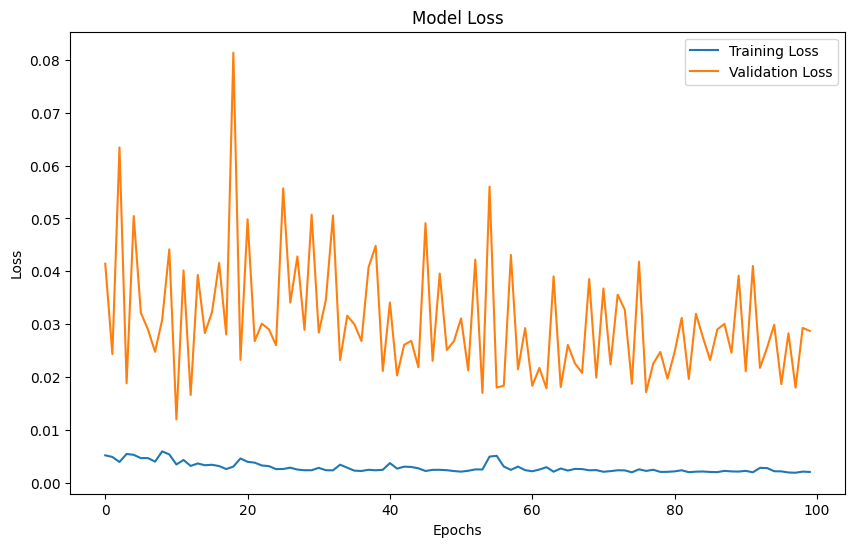

In [10]:
# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


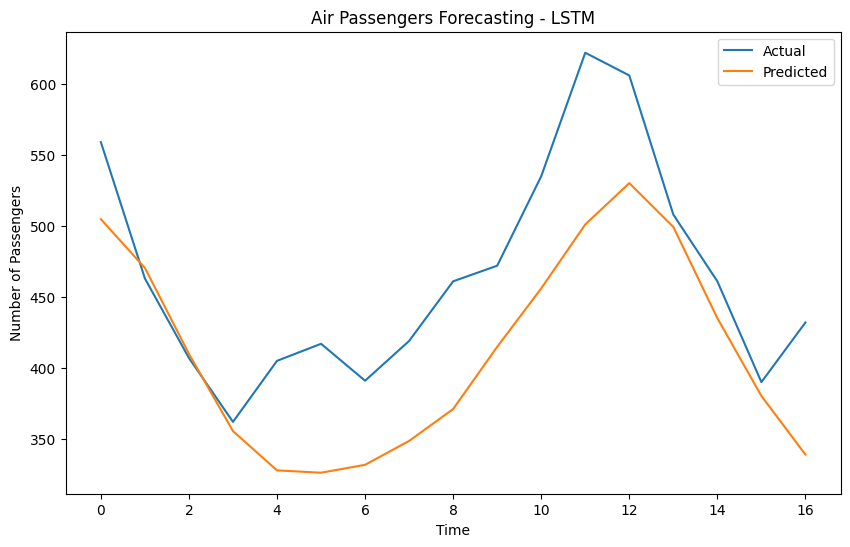

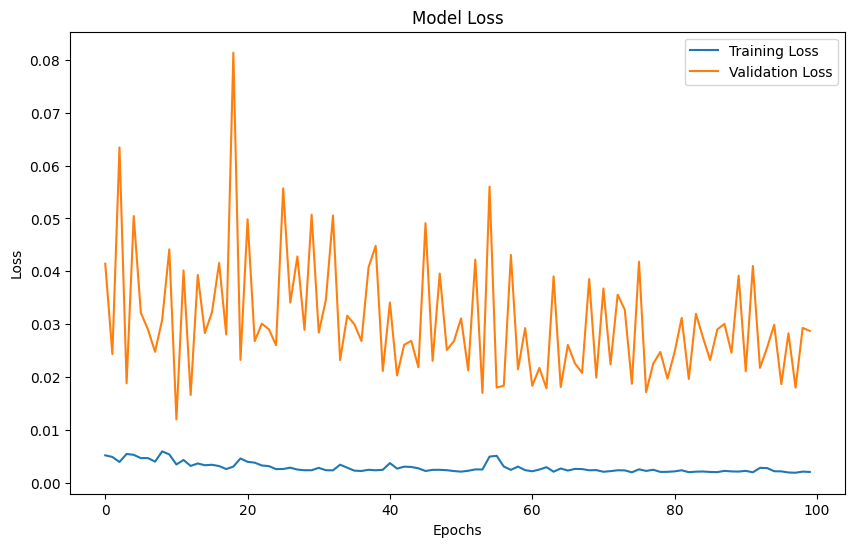

In [11]:
# Plot the predicted vs. actual values
plt.figure(figsize=(10, 6))
plt.plot(y_test_orig, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('Air Passengers Forecasting - LSTM')
plt.xlabel('Time')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [14]:
#Image Classification
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocess the data
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


In [15]:
# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [16]:
# Define ReduceLROnPlateau callback
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)

# Train the model
history = model.fit(X_train, y_train, batch_size=128, epochs=10, validation_data=(X_test, y_test), callbacks=[reduce_lr])


Epoch 1/10
469/469 [==============================] - 57s 120ms/step - loss: 0.2423 - accuracy: 0.9284 - val_loss: 0.0738 - val_accuracy: 0.9775 - lr: 0.0010
Epoch 2/10
469/469 [==============================] - 58s 123ms/step - loss: 0.0668 - accuracy: 0.9798 - val_loss: 0.0563 - val_accuracy: 0.9822 - lr: 0.0010
Epoch 3/10
469/469 [==============================] - 57s 121ms/step - loss: 0.0479 - accuracy: 0.9860 - val_loss: 0.0383 - val_accuracy: 0.9872 - lr: 0.0010
Epoch 4/10
469/469 [==============================] - 48s 102ms/step - loss: 0.0369 - accuracy: 0.9884 - val_loss: 0.0369 - val_accuracy: 0.9879 - lr: 0.0010
Epoch 5/10
469/469 [==============================] - 48s 102ms/step - loss: 0.0303 - accuracy: 0.9903 - val_loss: 0.0364 - val_accuracy: 0.9876 - lr: 0.0010
Epoch 6/10
469/469 [==============================] - 43s 91ms/step - loss: 0.0247 - accuracy: 0.9924 - val_loss: 0.0338 - val_accuracy: 0.9890 - lr: 0.0010
Epoch 7/10
469/469 [==============================] -

313/313 [==============================] - 4s 12ms/step - loss: 0.0270 - accuracy: 0.9908
Test Loss: 0.026990298181772232
Test Accuracy: 0.9908000230789185


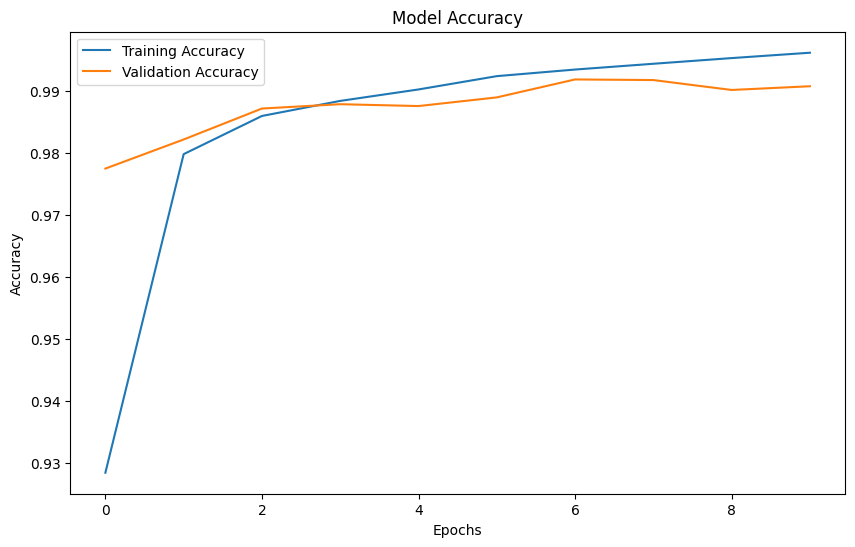

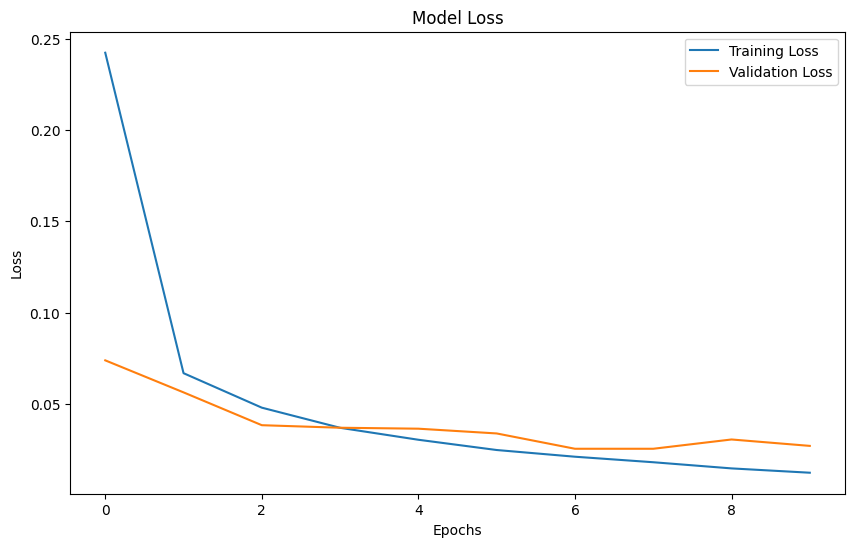

In [17]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# Visualize training history
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


313/313 [==============================] - 6s 19ms/step - loss: 0.0270 - accuracy: 0.9908
Test Loss: 0.026990298181772232
Test Accuracy: 0.9908000230789185


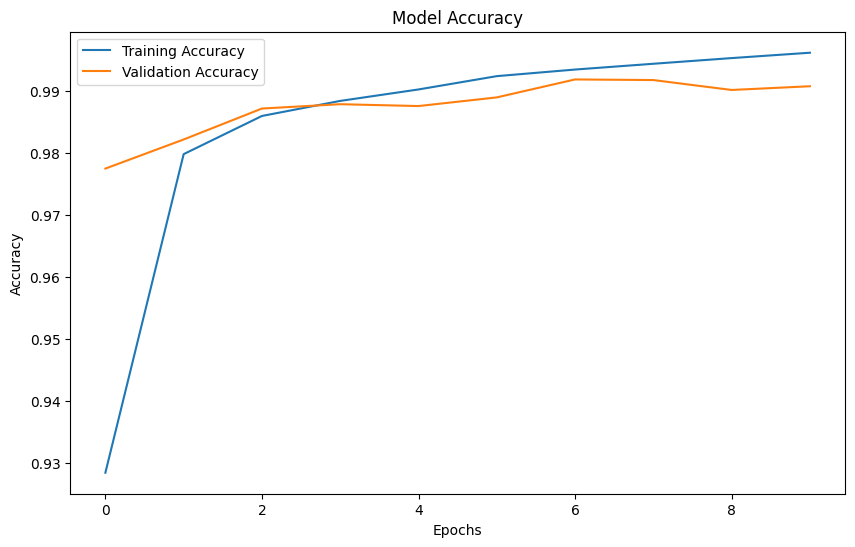

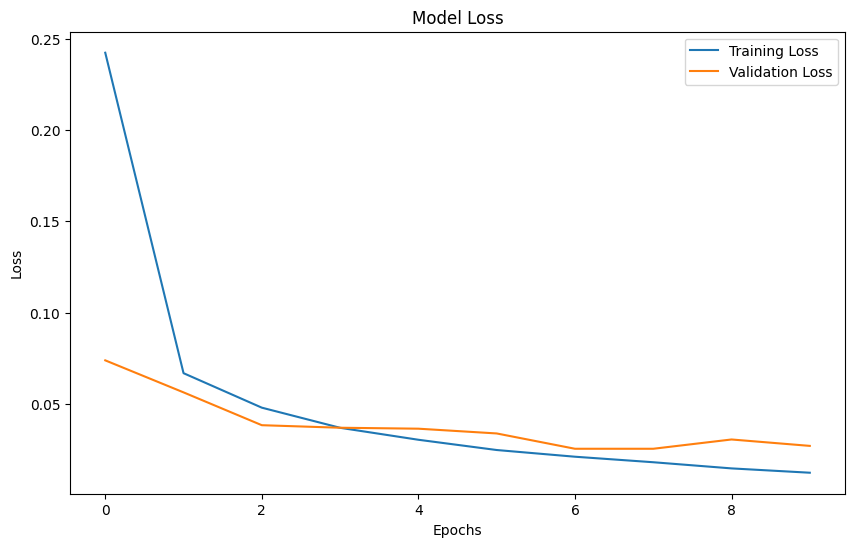

In [18]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# Visualize training history
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
